# Introdução

O segundo experimento da disciplina teve como um dos temas a determinação de curvas características de diodos.

O diodo é um dispositivo feito de material semicondutor que possui a propriedade de conduzir corrente apenas quando excitado por uma tensão em determinado sentido. Desta forma, se conseguirmos medir tanto a tensão quanto a corrente presente no diodo, podemos definir uma curva que as relacione, a chamada **curva característica**.

Em um diodo ideal, a corrente que passa por ele pode ser definida pela seguinte equação, chamada de **Equação de Shockley**:
$$I_D = I_S\left( e^{\frac{V_D}{V_T}} -1 \right) , \,\,\text{onde}\,\,\, V_T = \frac{kT}{q}$$
Nessa equação temos que $I_D$ é a corrente no diodo, $I_S$ é a corrente de saturação reversa, $V_D$ é a tensão no diodo e $V_T$ é a tensão termodinâmica. Em $V_T$, $k$ é a constante de Boltzmann($k=1.38\cdot10^{-23} \frac{J}{K}$), $T$ é a temperatura dada em Kelvin e $q$ é a carga do elétron($k=1.6\cdot10^{-19} C$).

Desta forma, podemos obter a curva característica em um diodo arbitrario da seguinte forma:

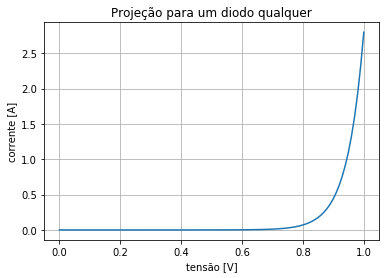

In [1]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

def I_D(V_D):
    I_S = 2.76935959e-08
    V_T = 5.42561715e-02 #26mV  
    return float(I_S*(np.exp(V_D/V_T)-1.))

v = np.linspace(0,1,100) # Obtem um vetor com 100 pontos entre 0 e 1
i = list(map(I_D, v)) # Aplica a função I_D em cada elemento de v

plt.plot(v,i)
plt.title("Projeção para um diodo qualquer")
plt.grid()
plt.ylabel('corrente [A]')
plt.xlabel('tensão [V]')   
plt.show()

As ferramentas disponíveis em laboratório foram um osciloscópio **Keysight Agilent DSO-X2024A**, ![Keysight Agilent DSO-X2024A](https://s7.images.keysight.com/is/image/Keysight/PROD-1945124-01?$ProdMainPreset$) o gerador de funçoes **Tektronics AFG3021B** ![Tektronics AFG3021B](https://www.tek.com/sites/default/files/styles/slider_item_1x_mobile/public/media/image/AFG3252C_angle2_white_410_0.jpg?itok=CXYppRqD) além de todos os dispositivos necessários para montar o circuito elétrico.

# Dados

No início do experimento, pede-se que os dados lidos pelo osciloscópio sejam salvos em *pendrive* para análise posterior e para visualização no relatório. Desta forma, para cada item do expermento foram salvos arquivos de imagem(**.png**) e arquvios de dados brutos(**.csv**). 

Ao longo do curso de Engenharia vi como uma prática comum a análise de dados comma-separated-values(csv) em programas como Excel ou LibreOffice Calc. De fato, é um método rápido de se obter uma visualização dos dados obtido, além de ser uma plataforma muito mais conhecida entre os alunos, porém, com o uso de arquivos com uma grande quantidade de dados, este processo se torna custoso para o computador e a rápida visualização se torna um empecílio.

Para evitar tais problemas e até como uma forma de treinar, decidi por analisar os dados por meio de Python e suas bibliotecas. Tal decisão poderia ter como consequência um tempo maior de desenvolvimento, porém garantiria maior flexibilidade na análise e processamento dos dados.

# O experimento

Tendo em vista que o foco desse texto é apenas descrever e apresentar o processo de criação dos códigos, apenas dois dos exercícios serão descritos com detalhes.

O primeiro exercício pedia para que fosse montado o seguinte circuito elétrico:
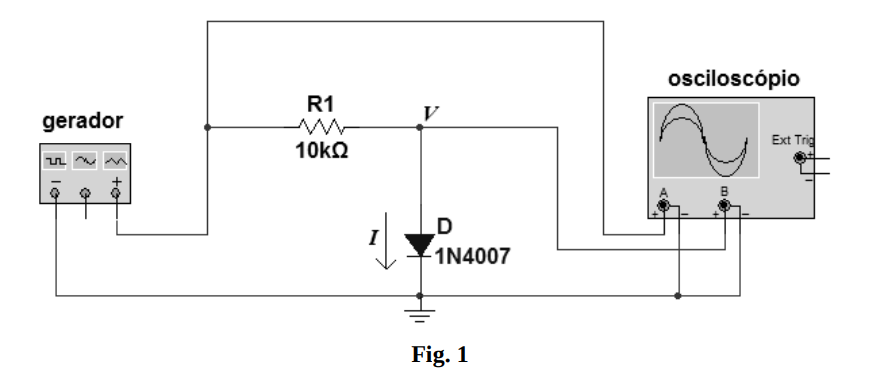

Apos montado o circuito foi aplicada uma onda triangular de amplitude pico-a-pico 10V e de frequência 1kHz. Desta forma obteve-se da tela do osciloscópio a seguinte imagem.
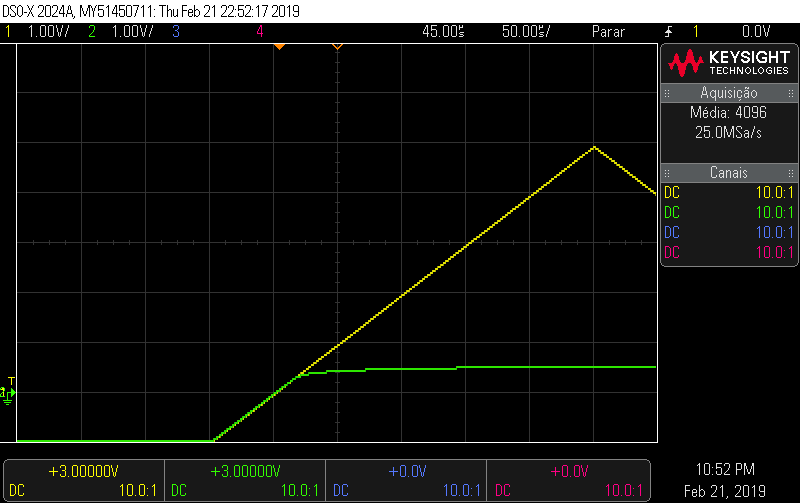

A linha amarela do gráfico representa a tensão de entrada(criada no gerador de funções) e a linha verde representa a tensão no diodo.

Após isso, pediu-se para que fosse obtida a curva característica. Para isso precisamos analisar o circuito montado. A tensão de entrada do circuito é dividida entre o diodo e o resistor, logo por meio das duas variáveis que temos(representadas pelas linhas coloridas no osciloscópio) conseguimos obter tanto a tensão no resistor quanto a no diodo. O equacionamento se dá por meio da relação:

$V_{gerador}=V_{resistor}+V_{diodo}$

Desta forma, por meio da __[Lei de Ohm](https://pt.wikipedia.org/wiki/Lei_de_Ohm)__, conseguimos obter o valor da corrente que passa pelo resistor.

$I_{resistor}=\frac{V_{resistor}}{R_{resistor}}$

Já que os dispositivos foram ligados em série e a corrente presente no resistor é igual a presente no diodo, podemos obter a corrente no diodo por meio da mesma relação.

Apesar de o osciloscópio possuir funções matemáticas, realizar uma operação tal qual a descrita anteriormente não seria possível. Para tal usou-se os dados do arquivo **.csv** e o processamento em Python.

## Uma rápida pausa para falar sobre csv

<font color=grey>Arquivos csv são estruturados de tal modo que as colunas de uma tabela são separadas por virgulas - e dai o nome comma-separated-values - e as linhas separadas por quebras de linha no arquivo. Aqui segue um exemplo de um arquivo csv gerado pelo osciloscópio:</font>

`x-axis,1,2
second,Volt,Volt
-205.000E-06,,
-204.900E-06,,
-204.800E-06,,
-204.700E-06,-2.105449066E+00,-2.105449066E+00
-204.600E-06,-2.105449066E+00,-2.105449066E+00
-204.500E-06,-2.105449066E+00,-2.105449066E+00
-204.400E-06,-2.105449066E+00,-2.105449066E+00
-204.300E-06,-2.105449066E+00,-2.105449066E+00`

Desta maneira, notam-se alguns pontos na leitura deste arquivo:
- O arquivo nos dá cabeçalhos(representados pela primeira e segunda linha).
- Na primeira coluna se armazenam dados relativos ao tempo com unidade de segundos.
- A segunda e terceira coluna são responsáveis por armazenar dados do segundo e terceiro canal do osciloscópio, respectivamente.
- As três primeiras linhas do arquivo apresentam apenas valores de tempo e nenhum valor medido no osciloscópio.

Portanto, de início devemos ler o arquivo

In [5]:
inFile = "exampleFiles/DE_Experimento2/scope_5.csv"

inputCSV = open(inFile)

A função `open()` de Python é responsável por abrir um arquivo. Apesar de existirem diversos métodos para a leitura de arquivos, como apresentado na __[documentação](https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files)__, optou-se por ler as linhas do código por meio de um laço, armazenando cada linha em uma variável e fazendo o processamento individualmente.

`lines=[]
for line in inputCSV:
    if(len(line.split(",")[0])>3 and len(line.split(",")[1])>3 and len(line.split(",")[2])>3):
        lines.append(line)`

A idéia desse trecho de código era filtrar linhas com valores incompletos. Para isso iniciaria-se um laço onde cada linha do arquivo seria testada. O processo dividiria a linha quando fosse encontrado o caracter de separação("`,`") e seu tamanho seria comparado, de tal maneira que só seria salvo na variável `lines` linhas que não tivessem erro.

Se olhado com calma, nota-se de início que houve um erro. O erro não tem natureza sintatica visto que ao executar o código não é gerada mensagem alguma.Neste código vemos que admite-se que uma linha com erro possui três ou menos caracteres. De início, o código remove um dos cabeçalhos e três dos valores que deveriam ser retirados de fato. 

A presença desse erro não influencia de forma significativa na análise dos dados deste experminto, visto que em um arquivo *csv* são salvos aproximadamente 5000 pontos de dados e nenhuma variação significativa ocorre em pequenos espaços de tempo, porém erros como esses podem ter consequências fatais.

A forma correta de fazer tal filtragem seria:

In [6]:
lines=[]
for line in inputCSV:
    lineComplete=True
    for i in range(0,3):
        if(len(line.split(",")[i])==0):
            lineComplete=False
    if(lineComplete): 
            lines.append(line)


Neste trecho o código testa se, após separarmos cada trecho da linha, o seu tamanho é maior que zero. Caso ocorra um erro, a leitura da linha é ignorada.

Após armazenadas as linhas, podemos analisar individualmente cada linha.
Antes de iniciar a análise, determinam-se algumas variáveis importantes, como a resistencia medida em laboratório para o resistor($9.92k\Omega$) e os *arrays* responsáveis por armazenar os dados de tempo, tensão em cada canal e corrente.

In [7]:
resistence= 9920 #Ohms
T=[]
V1=[]
V2=[]
I=[]

Após essa etapa é interessante que se realize mais um laço, desta vez responsavel por cortar cada uma das strings armazenadas na linha do arquivo, converte-las em número de ponto flutuante e armazena-los em suas respectiveis variaveis. O laço também é responsável por realizar o cálculo da corrente no resistor.

In [8]:
for num_line in range(2,len(lines)):
    t=float(lines[num_line].split(",")[0])
    v1=float(lines[num_line].split(",")[1])
    v2=float(lines[num_line].split(",")[2])
    i = (v1-v2)/resistence

    T.append(t)
    V1.append(v1)
    V2.append(v2)
    I.append(i)

Com os valores devidamente armazenado nas variáveis, agora decide-se por apresentar os resultados em gráficos. Para isso utiliza-se a biblioteca **matplotlib**, mais especificamente o módulo **pyplot**. 

Inicialmente, para fins de visualização, são apresentados os valores de tensão gerada e os valores de tensão no diodo. Para isso utiliza-se a função `plot()`, em que são passados como argumentos os dois arrays que armazenam o vetor de tempo e de tensão. É valido notar que podemos desenhar em um mesmo gráfico mais de uma informação apenas utilizando mais de uma vez a função.

Definem-se, então os titulos dos eixos com as funções `xlabel()` e `ylabel()`, apresentam-se os rótulos dos dados com a função `legend()` e habilita-se a grade no gráfico por meio da função `grid()`.

Por fim, os resultados são apresentados ao chamar a função `show()`.

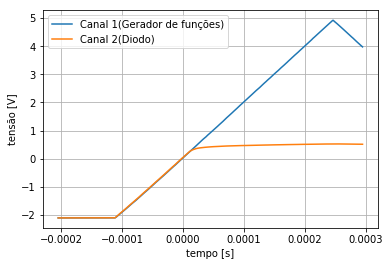

In [12]:
plt.figure(0)
plt.plot(T, V1, label='Canal 1(Gerador de funções)')
plt.plot(T, V2, label='Canal 2(Diodo)')
plt.xlabel('tempo [s]')
plt.ylabel('tensão [V]')   

plt.legend()
plt.grid()

plt.show()

De forma semelhante, apresentamos a curva característica em uma outra imagem. Para utilizar multiplos objetos de gráfico é usada a função `figure()`. É possível também apresentar um título para o gráfico por meio da função `title()`

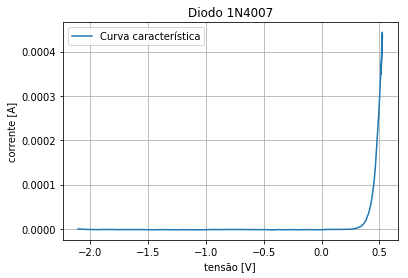

In [10]:
plt.figure(1)
plt.plot(V2, I, label='Curva característica')

plt.ylabel('corrente [A]')
plt.xlabel('tensão [V]')   
plt.grid()

plt.title("Diodo 1N4007")

plt.legend()
plt.show()

# Para estudos futuros

Como foi possível ver neste experimento, apesar de diversos processos presentes na análise dos dados serem automatizados, alguns deles se tornaram repetitivos. A intenção de estudos futuros é desenvolver uma classe que permitisse um uso mais efciênte das ferramentas disponibilizadas.

Entre as futuras possíveis implementações estão:
- Criação de uma classe responsável por ler os dados do osciloscópio
- Criação de uma classe responsável por traçar a curva característica

# Fontes

Para determinar $I_S$: https://www.reddit.com/r/ECE/comments/5rj0tb/where_on_this_data_sheet_for_the_1n4007_diode_can/
http://www.mouser.com/ds/2/149/1N4007-888322.pdf
http://www.baudaeletronica.com.br/Documentos/Diode_1N4001%20to%201N4007.pdf
http://www.dsif.fee.unicamp.br/~fabiano/EE530/PDF/J%20-%20Diodos.pdf